In [1]:
from data_manipulation.loaders import *
from config import config as cfg
from models.model3 import *
import datetime
import os
import segmentation_models as sm
import random
import matplotlib.pyplot as plt

Segmentation Models: using `tf.keras` framework.


In [2]:
%load_ext tensorboard

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
data = Dataset(cfg['dataset_path'], cfg['images_path'], cfg['modality'],
                initial_slice=cfg['initial_slice'], final_slice=cfg['final_slice'], extract=False)

>> Filtering black images (without ground truth)..
    ------------
    Before deleting:  0
    After deleting:  0
    ------------
    Before deleting:  0
    After deleting:  0
<< Done!

>> Searching for sets in csv format..
!! Found them.


In [5]:
train_generator = DataGenerator(data.train, batch_size=64)
val_generator = DataGenerator(data.val, batch_size=cfg['batch_size'])

In [7]:
#input_shape = cfg['image_shape'] + (1,)
#model = unet(input_shape)

unet_model = unet_backbone_resnet34_jaccard_loss()

tf.keras.backend.clear_session()
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

if not os.path.exists(log_dir):
    os.makedirs(log_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = unet_model.fit(train_generator, validation_data=val_generator, epochs = cfg['epochs'], callbacks=[tensorboard_callback])

D:\Programas\anaconda3\envs\tcc\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/150
155/155 [==============================] - 82s 461ms/step - loss: 0.6354 - custom_mean_iou: 0.3455 - f1-score: 0.4421 - val_loss: 0.7511 - val_custom_mean_iou: 0.2505 - val_f1-score: 0.2656
Epoch 2/150
155/155 [==============================] - 40s 257ms/step - loss: 0.5151 - custom_mean_iou: 0.4899 - f1-score: 0.5976 - val_loss: 0.6823 - val_custom_mean_iou: 0.3162 - val_f1-score: 0.3780
Epoch 3/150
155/155 [==============================] - 40s 257ms/step - loss: 0.4878 - custom_mean_iou: 0.5149 - f1-score: 0.6296 - val_loss: 0.5789 - val_custom_mean_iou: 0.4412 - val_f1-score: 0.5111
Epoch 4/150
155/155 [==============================] - 40s 258ms/step - loss: 0.4581 - custom_mean_iou: 0.5448 - f1-score: 0.6628 - val_loss: 0.5420 - val_custom_mean_iou: 0.4833 - val_f1-score: 0.5605
Epoch 5/150
155/155 [==============================] - 40s 257ms/step - loss: 0.4373 - custom_mean_iou: 0.5654 - f1-score: 0.6848 - val_loss: 0.4668 - val_custom_mean_iou: 0.5627 - val_f1-scor

155/155 [==============================] - 40s 257ms/step - loss: 0.2292 - custom_mean_iou: 0.7734 - f1-score: 0.8626 - val_loss: 0.2817 - val_custom_mean_iou: 0.7475 - val_f1-score: 0.8141
Epoch 42/150
155/155 [==============================] - 40s 257ms/step - loss: 0.2289 - custom_mean_iou: 0.7736 - f1-score: 0.8628 - val_loss: 0.2803 - val_custom_mean_iou: 0.7491 - val_f1-score: 0.8152
Epoch 43/150
155/155 [==============================] - 40s 257ms/step - loss: 0.2273 - custom_mean_iou: 0.7753 - f1-score: 0.8639 - val_loss: 0.2764 - val_custom_mean_iou: 0.7523 - val_f1-score: 0.8186
Epoch 44/150
155/155 [==============================] - 40s 256ms/step - loss: 0.2257 - custom_mean_iou: 0.7769 - f1-score: 0.8650 - val_loss: 0.2764 - val_custom_mean_iou: 0.7529 - val_f1-score: 0.8184
Epoch 45/150
155/155 [==============================] - 40s 257ms/step - loss: 0.2259 - custom_mean_iou: 0.7766 - f1-score: 0.8649 - val_loss: 0.2853 - val_custom_mean_iou: 0.7432 - val_f1-score: 0.812

155/155 [==============================] - 40s 256ms/step - loss: 0.1986 - custom_mean_iou: 0.8035 - f1-score: 0.8838 - val_loss: 0.2604 - val_custom_mean_iou: 0.7648 - val_f1-score: 0.8336
Epoch 82/150
155/155 [==============================] - 40s 256ms/step - loss: 0.1982 - custom_mean_iou: 0.8039 - f1-score: 0.8840 - val_loss: 0.2502 - val_custom_mean_iou: 0.7753 - val_f1-score: 0.8408
Epoch 83/150
155/155 [==============================] - 40s 256ms/step - loss: 0.1976 - custom_mean_iou: 0.8044 - f1-score: 0.8845 - val_loss: 0.2491 - val_custom_mean_iou: 0.7766 - val_f1-score: 0.8417
Epoch 84/150
155/155 [==============================] - 40s 256ms/step - loss: 0.1959 - custom_mean_iou: 0.8062 - f1-score: 0.8857 - val_loss: 0.2496 - val_custom_mean_iou: 0.7757 - val_f1-score: 0.8416
Epoch 85/150
155/155 [==============================] - 40s 257ms/step - loss: 0.1956 - custom_mean_iou: 0.8065 - f1-score: 0.8859 - val_loss: 0.2494 - val_custom_mean_iou: 0.7757 - val_f1-score: 0.841

155/155 [==============================] - 40s 256ms/step - loss: 0.1782 - custom_mean_iou: 0.8236 - f1-score: 0.8977 - val_loss: 0.2364 - val_custom_mean_iou: 0.7869 - val_f1-score: 0.8527
Epoch 122/150
155/155 [==============================] - 40s 257ms/step - loss: 0.1773 - custom_mean_iou: 0.8244 - f1-score: 0.8982 - val_loss: 0.2377 - val_custom_mean_iou: 0.7853 - val_f1-score: 0.8517
Epoch 123/150
155/155 [==============================] - 40s 256ms/step - loss: 0.1773 - custom_mean_iou: 0.8245 - f1-score: 0.8983 - val_loss: 0.2378 - val_custom_mean_iou: 0.7854 - val_f1-score: 0.8516
Epoch 124/150
155/155 [==============================] - 40s 256ms/step - loss: 0.1773 - custom_mean_iou: 0.8245 - f1-score: 0.8983 - val_loss: 0.2375 - val_custom_mean_iou: 0.7854 - val_f1-score: 0.8518
Epoch 125/150
155/155 [==============================] - 40s 257ms/step - loss: 0.1770 - custom_mean_iou: 0.8247 - f1-score: 0.8984 - val_loss: 0.2406 - val_custom_mean_iou: 0.7818 - val_f1-score: 0

In [8]:
unet_model.save('modelo3.h5')

In [9]:
def visualize_prediction(i, val_preds):
    img = data.test[i][0]
    img_arr = cv2.imread(img)
    plt.imshow(img_arr)
    plt.show()
    gt = data.test[i][1]
    gt_arr = cv2.imread(gt, 0)
    plt.imshow(gt_arr) 
    plt.show()
    plt.imshow(np.argmax(val_preds[i], axis=-1))
    
    plt.show()

In [10]:
test_generator = DataGenerator(data.test, batch_size=64)
val_preds = unet_model.predict(test_generator, verbose=1)

19/19 [==============================] - 5s 228ms/step


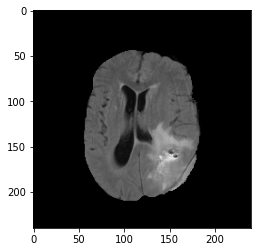

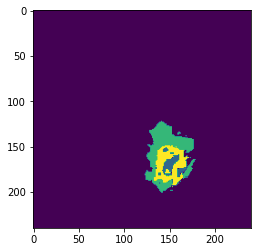

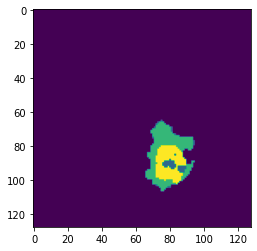

In [11]:
visualize_prediction(200, val_preds)